| Step                                   | Description                                                                              |
|----------------------------------------|------------------------------------------------------------------------------------------|
| Data Loading                           | Import the data into a DataFrame.                                                        |
| Exploratory Data Analysis (EDA)        | Visualize and understand the distribution, statistics, and relationships among variables.|
| Data Cleaning & Preprocessing          | Handle missing values, format dates, correct inconsistencies, and remove outliers.         |
| Feature Engineering                    | Create or transform variables (e.g., calculate car age, encode categorical features).      |
| Data Splitting                         | Split the data into training and testing sets.                                           |
| Baseline Model Building                | Build a simple model (such as linear regression) to set a baseline performance.            |
| Model Evaluation                       | Assess model performance using metrics (e.g., MAE, RMSE, R²).                              |
| Advanced Modeling                      | Experiment with more complex models (e.g., Random Forest, Gradient Boosting).              |
| Hyperparameter Tuning & Validation     | Optimize model parameters using techniques like Grid Search or Randomized Search with CV.   |
| Feature Importance & Model Interpretation | Analyze which features influence predictions the most and interpret the results.          |
| Conclusions & Next Steps               | Summarize findings, discuss limitations, and outline improvements for future work.         |


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats

In [2]:
pd.set_option('display.max_columns', None)

### Data Loading

In [3]:
df = pd.read_csv('csv/autos.csv')

### Exploratory Data Analysis (EDA)

In [4]:
df.head()

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   index                371528 non-null  int64 
 1   dateCrawled          371528 non-null  object
 2   name                 371528 non-null  object
 3   seller               371528 non-null  object
 4   offerType            371528 non-null  object
 5   price                371528 non-null  int64 
 6   abtest               371528 non-null  object
 7   vehicleType          333659 non-null  object
 8   yearOfRegistration   371528 non-null  int64 
 9   gearbox              351319 non-null  object
 10  powerPS              371528 non-null  int64 
 11  model                351044 non-null  object
 12  kilometer            371528 non-null  int64 
 13  monthOfRegistration  371528 non-null  int64 
 14  fuelType             338142 non-null  object
 15  brand                371528 non-nu

In [6]:
df.isna().sum()

index                      0
dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

In [7]:
df.describe()

,index,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,371528.000000,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,185763.500000,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,107251.039743,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,92881.750000,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,185763.500000,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,278645.250000,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,371527.000000,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


In [8]:
df.corr(numeric_only=True)

,index,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
index,1.000000,-0.000696,-0.000060,0.000769,0.003625,0.000914,NaN,0.000038
price,-0.000696,1.000000,-0.000182,0.006850,-0.000635,-0.002826,NaN,-0.003164
yearOfRegistration,-0.000060,-0.000182,1.000000,0.000351,-0.055319,-0.011607,NaN,-0.001652
powerPS,0.000769,0.006850,0.000351,1.000000,-0.010738,0.044358,NaN,0.027113
kilometer,0.003625,-0.000635,-0.055319,-0.010738,1.000000,0.001838,NaN,-0.026694
monthOfRegistration,0.000914,-0.002826,-0.011607,0.044358,0.001838,1.000000,NaN,0.014963
nrOfPictures,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
postalCode,0.000038,-0.003164,-0.001652,0.027113,-0.026694,0.014963,NaN,1.000000


<Axes: >

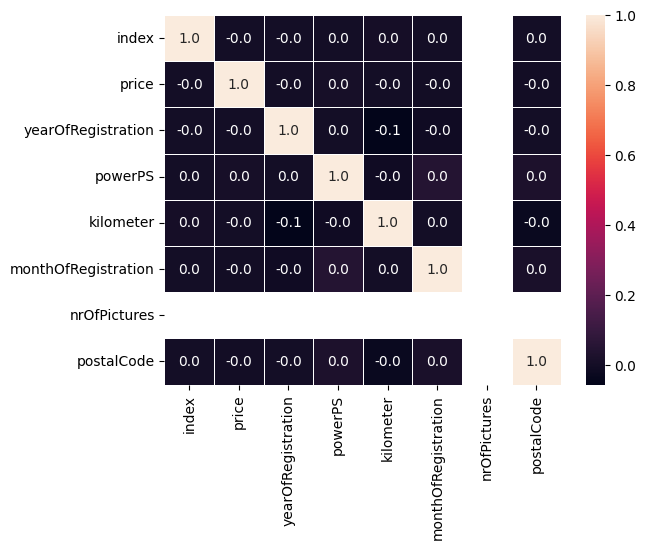

In [9]:
sns.heatmap(df.corr(numeric_only=True), annot=True, linewidth=.5, fmt=".1f")

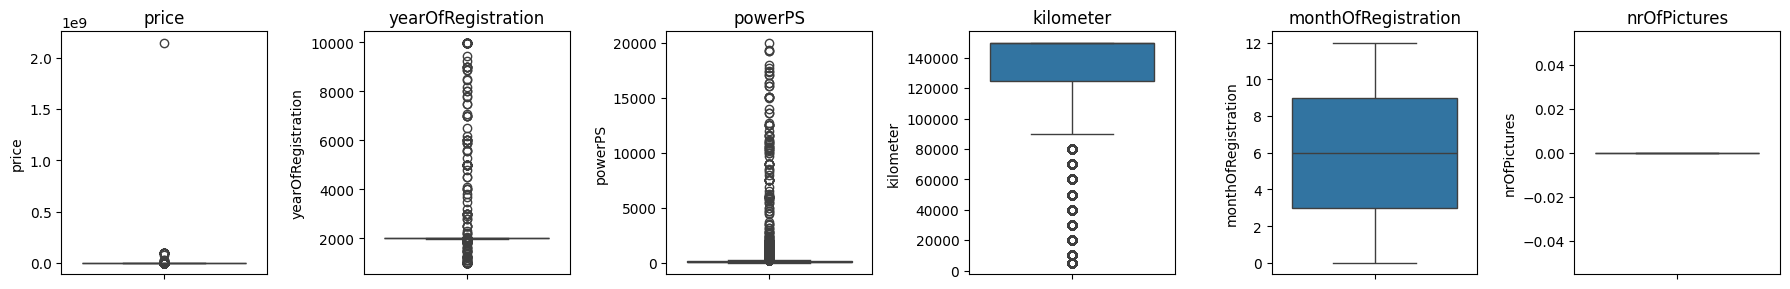

In [10]:
# Suponha que 'df' seja o seu DataFrame e que você queira plotar 6 colunas:
columns = ['price', 'yearOfRegistration', 'powerPS', 'kilometer', 'monthOfRegistration', 'nrOfPictures']

# Cria uma figura com 1 linha e 6 colunas de subplots
fig, axes = plt.subplots(1, 6, figsize=(18, 3))

# Para cada coluna, plota um boxplot no subplot correspondente
for i, col in enumerate(columns):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)  # Define o título com o nome da coluna

plt.tight_layout()
plt.show()

### Data Cleaning & Preprocessing

In [11]:
df['dateCrawled'] = pd.to_datetime(df['dateCrawled'])
df['dateCreated'] = pd.to_datetime(df['dateCreated'])
df['lastSeen'] = pd.to_datetime(df['lastSeen'])

In [12]:
df.fillna(0, inplace=True)

In [13]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Definir os limites inferior e superior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Obter os outliers: linhas onde 'price' está abaixo do limite inferior ou acima do limite superior
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

df = df[~df.index.isin(outliers.index)]

### Feature Engineering

In [14]:
current_year = datetime.now().year

df['age'] = current_year - df['yearOfRegistration']

In [15]:
df['age']

0         32
2         21
3         24
4         17
5         30
          ..
371522    20
371523    20
371524    25
371525    29
371526    23
Name: age, Length: 343420, dtype: int64

<Axes: ylabel='age'>

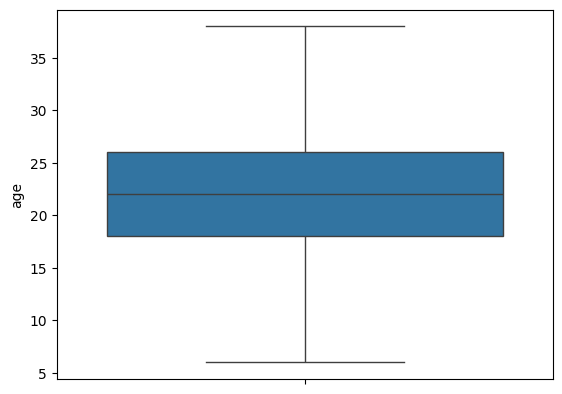

In [16]:
sns.boxplot(df['age'], showfliers=False)

### Data Splitting

In [23]:
from sklearn.model_selection import train_test_split

In [38]:
feature = ['seller', 'price', 'vehicleType', 'gearbox', 'powerPS', 'model', 'kilometer', 'fuelType', 'brand', 'notRepairedDamage']

df_model = df[feature]

In [42]:
df_model_encoded = pd.get_dummies(df_model)

In [44]:
X = df_model_encoded.drop('price', axis=1) #Remove the 'price' column (axis=1)
y = df_model_encoded['price']

In [45]:
# Split the date into training and test (80% train and 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Baseline Model Building

### Model Evaluation Metrics

| Metric  | Description | Interpretation |
|---------|------------|----------------|
| **MAE (Mean Absolute Error)** | Average absolute difference between actual and predicted values. | Lower is better. Measures how far predictions are from actual values. |
| **RMSE (Root Mean Squared Error)** | Similar to MAE but squares errors before averaging, making it more sensitive to large errors. | Lower is better. Penalizes large errors more than MAE. |
| **R² Score (Coefficient of Determination)** | Measures how well the model explains the variance in the target variable. | Ranges from 0 to 1 (higher is better). A negative value means the model is worse than a simple average prediction. |


In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create and train the model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Faz previsões no conjunto de teste
predict_lr = model_lr.predict(X_test)

# Avalia o modelo
mae = mean_absolute_error(y_test, predict_lr)
rmse = np.sqrt(mean_squared_error(y_test, predict_lr))
r2 = r2_score(y_test, predict_lr)

print("Linear Regression:")
print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)

# MAE (2022.25) → On average, predictions deviate by about 2022 units from actual values.
# RMSE (2766.38) → Larger errors have a stronger impact, indicating some significant prediction deviations.
# R² (0.481) → The model explains 48.1% of the variance in the data, suggesting room for improvement.

Linear Regression:
MAE: 2022.2476155849822
RMSE: 2766.377553805449
R²: 0.4813928792849237


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Cria e treina o modelo Random Forest
model_rf = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42)
model_rf.fit(X_train, y_train)

# Faz previsões e avalia
predicoes_rf = model_rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, predict_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, predict_rf))
r2_rf = r2_score(y_test, predict_rf)

print("Random Forest")
print("MAE:", mae_rf)
print("RMSE:", rmse_rf)
print("R²:", r2_rf)
